# Código Chato

In [ ]:
#@title
import pandas as pd
import numpy as np


In [ ]:
#@title
dados = pd.read_excel('Dashboard.xlsx',sheet_name= "Comissão simulações")
informacao = dados.iloc[7]
dados


,Unnamed: 0,março,abril,maio,junho,julho
0,Receita em Carteira,899475,828971,836561,769951,NaN
1,Novas receitas,249579,344561,462349,600824,NaN
2,Receita total,1149054,1173532,1298910,1370775,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,CPS % - Receita Total,0.0592,0.0629,0.06,0.0594,NaN
5,Sobra,0.0108,0.0071,0.01,0.0106,NaN
6,Sobra $,12409.8,8332.08,12989.1,14530.2,NaN
7,Comissão (10%),1240.98,833.208,1298.91,1453.02,956
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title
dados.dropna(inplace=True)
dados.index = range(dados.shape[0])
dados.columns = (['Account Manager','Remuneração','Meta','Gerenciado','% CPS','Performance'])
dados = dados.loc[:,['Account Manager','Performance']]
managers_3 = dados[1:6]
manager_5 = dados.iloc[[7]]
managers_7 = dados[9:12]


SyntaxError: ignored

,Account Manager,Performance
0,Comissão (10%),956
1,Account Manager,Performance
2,Adriana Mollo,0.971718
3,Gustavo Santana,1.06283
4,Gustavo Marcandalli,0.822873
5,Paulo Smaniotto,0.751697
6,Jocilaine Ribas,1.06055
7,Account Manager,Performance
8,Michelle Graça,1.23407
9,Account Manager,Performance


In [ ]:
#@title
managers_3['Performance']*=100
managers_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Account Manager,Performance
1,Account Manager,PerformancePerformancePerformancePerformancePe...
2,Adriana Mollo,97.1718
3,Gustavo Santana,106.283
4,Gustavo Marcandalli,82.2873
5,Paulo Smaniotto,75.1697


In [ ]:
#@title
manager_5['Performance']*=100
manager_5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Account Manager,Performance
7,Michelle Graça,123.407


In [ ]:
#@title
managers_7['Performance']*=100
managers_7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Account Manager,Performance
9,Account Manager,PerformancePerformancePerformancePerformancePe...
10,Amanda França,73.19
11,Tamara Traldi,94.7132


In [ ]:
#@title
sucessful_managers = pd.concat([managers_3.query('Performance>100'),manager_5.query('Performance>100'),managers_7.query('Performance>100')])
sucessful_managers

,Account Manager,Performance
2,Gustavo Santana,106.283
5,Jocilaine Ribas,106.055
7,Michelle Graça,123.407


# Parte Interessante

In [ ]:

comissao =informacao.loc['junho']
comissao

1453.0215000000007

In [ ]:
#@title
total = 0
a_receber=[]
nomes = []
for performance in sucessful_managers.Performance:
  total+=performance
for performance in sucessful_managers.Performance:
  a_receber.append(comissao*(performance/total))
for name in sucessful_managers['Account Manager']:
  nomes.append(name)
df= {'Pessoa':nomes,'A receber': a_receber}
df_a_receber = pd.DataFrame(df)

df_a_receber


,Pessoa,A receber
0,Gustavo Santana,459.966970
1,Jocilaine Ribas,458.980224
2,Michelle Graça,534.074306


In [ ]:
#@title
comissao =informacao.loc['abrilr']

In [ ]:
#@title
all_managers = pd.concat([managers_3 ,manager_5,managers_7])
all_managers.index = range(all_managers.shape[0])
all_managers.loc[:,['Account Manager','Performance']]

,Account Manager,Performance
0,Adriana Mollo,97.1718
1,Gustavo Santana,106.283
2,Gustavo Marcandalli,82.2873
3,Paulo Smaniotto,75.1697
4,Jocilaine Ribas,106.055
5,Michelle Graça,123.407
6,Amanda França,73.19
7,Tamara Traldi,94.7132


In [ ]:
#@title
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


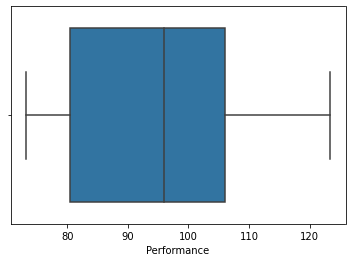

In [ ]:
#@title
sns.boxplot(all_managers.Performance)

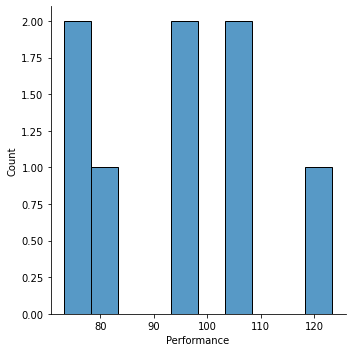

In [ ]:
#@title
ax = sns.displot(all_managers.Performance,bins = 10)